In [118]:
import pandas as pd
import csv
from constants import *
import numpy as np
from math import log, floor


In [119]:
year = 2019
path = "odds_ratio_module/data/{}/df_AFv2_EPA0_CHILD.csv".format(year)

In [120]:
label_dict = {
   
    'GENDER' : {
                1.0: "Male",
                2.0: "Female",
                9.0: "Missing"
               },
    'RACE': {
        1.0: "White",
        2.0: "Black or African American",
        3.0: "American Indian or Alaskan Native",
        4.0: "Asian",
        5.0: "Native Hawaiian or other Pacific Islander",
        6.0: "Other race",
        77.0: "Missing"
        # 7.0: 'No Preferred race',
        # 77.0: "Don't know/Not sure",
        # 99.0: 'Refused'
    },
    'POVERTY': {
        1.0: "Below Poverty Guideline",
        0.0: "Above Poverty Guideline",
        77.0: "Missing"
    }
}

In [146]:
df = pd.read_csv(path)
df.columns

Index(['index', 'ZEV_MANDATES', 'GENDER', 'RACE', 'POVERTY', 'DENSITY',
       'ASTHMA', 'STATE', 'EPA_REGION', 'YEAR'],
      dtype='object')

In [122]:
race_dict = {7.0: 77.0, 99.0:77.0}
df['RACE'] = df['RACE'].replace(race_dict)

In [123]:
df.shape

(39951209, 10)

In [126]:
def filter_df(df, col):
    tdf = df        .groupby([col])['ASTHMA'].count().reset_index()
    tdf['LABEL'] = tdf[col].apply(label_dict.get(col).get)
    return tdf.reset_index()

def get_value(df, value_col):
    return df.loc[df['LABEL']==value_col, ['ASTHMA']].values[0][0]

def get_per(a, b):
    value = (a*100)/b
    return "{:.2f}".format(value)

def human_format(number):
    units = ['', 'K', 'M', 'G', 'T', 'P']
    k = 1000.0
    magnitude = int(floor(log(number, k)))
    return '%.2f%s' % (number / k**magnitude, units[magnitude])

def combine_row(total_row, zev_row, other_row, col):
    rows = []
    missing = human_format(get_value(total_row, 'Missing'))
    row1 = ["{} (missing n = {})".format(col, missing), np.nan, np.nan]
    rows.append(row1)
    x = label_dict.get(col)
    sorted_labels = sorted(x.items(), key=lambda item: item[1])
    sorted_labels = [(i[0], i[1]) for i in sorted_labels if i[1]!='Missing']
    for i in sorted_labels:
        label = i[1]
        zev_value = get_value(zev_row, label)
        other_value = get_value(other_row, label)
        total_value = get_value(total_row, label)
        # zev_per = get_per(zev_value, total_value)
        # other_per = get_per(other_value, total_value)
        
        trow = [label, human_format(zev_value), human_format(other_value), human_format(total_value)]
        rows.append(trow)
    return rows
    

def make_row(df, col):
    total_row = filter_df(df, col)
    zev_df = df[df['STATE'].isin(ZEV_STATES)]
    zev_row = filter_df(zev_df, col)
    other_df = df[~df['STATE'].isin(ZEV_STATES)]
    other_row = filter_df(other_df, col)
    rows = combine_row(total_row, zev_row, other_row, col)
    return rows
    

In [127]:
features = ['GENDER', "RACE", "POVERTY"]    
rows = []
for feature in features:
    row = make_row(df, feature)
    rows.extend(row)
print(rows)

[['GENDER (missing n = 505.43K)', nan, nan], ['Female', '5.32M', '14.25M', '19.57M'], ['Male', '5.41M', '14.46M', '19.88M'], ['RACE (missing n = 3.43M)', nan, nan], ['American Indian or Alaskan Native', '203.90K', '400.16K', '604.06K'], ['Asian', '1.15M', '792.86K', '1.94M'], ['Black or African American', '812.04K', '4.94M', '5.75M'], ['Native Hawaiian or other Pacific Islander', '20.85K', '167.58K', '188.44K'], ['Other race', '728.78K', '1.31M', '2.04M'], ['White', '6.93M', '19.07M', '26.00M'], ['POVERTY (missing n = 4.07M)', nan, nan], ['Above Poverty Guideline', '7.49M', '20.90M', '28.39M'], ['Below Poverty Guideline', '2.38M', '5.12M', '7.50M']]


In [130]:
filter_df(df, "GENDER")

index  GENDER    ASTHMA    LABEL
0      0     1.0  19875886     Male
1      1     2.0  19569889   Female
2      2     9.0    505434  Missing

In [95]:
df['RACE'].unique()

array([ 7.,  1.,  6.,  2.,  3.,  4., 77., 99.,  5., nan])

In [129]:
df.groupby(['ASTHMA'])['DENSITY'].mean()

ASTHMA
0    17.891079
1    18.992018
Name: DENSITY, dtype: float64

In [131]:
df

index  ZEV_MANDATES  GENDER  RACE  POVERTY    DENSITY  ASTHMA  \
0             0             1     1.0  77.0        0  22.423151       0   
1             0             1     1.0  77.0        0  22.423151       0   
2             0             1     1.0  77.0        0  22.423151       0   
3             0             1     1.0  77.0        0  22.423151       0   
4             0             1     1.0  77.0        0  22.423151       0   
...         ...           ...     ...   ...      ...        ...     ...   
39951204  46508             0     2.0   3.0        1   9.056478       0   
39951205  46508             0     2.0   3.0        1   9.056478       0   
39951206  46508             0     2.0   3.0        1   9.056478       0   
39951207  46508             0     2.0   3.0        1   9.056478       0   
39951208  46508             0     2.0   3.0        1   9.056478       0   

          STATE  EPA_REGION  YEAR  
0           6.0           9     1  
1           6.0           9     1  
2           6.0           9     1  
3           6.0           9     1  
4           6.0           9     1  
...         ...         ...   ...  
39951204   55.0           5     1  
39951205   55.0           5     1  
39951206   55.0           5     1  
39951207   55.0           5     1  
39951208   55.0           5     1  

[39951209 rows x 10 columns]

In [189]:
one_hot = ['RACE', "GENDER"]
ttdf = pd.get_dummies(df, columns=one_hot)


# Separate majority and minority classes
df_majority = ttdf[ttdf['ASTHMA']==0]
df_minority = ttdf[ttdf['ASTHMA']==1]

# Downsample majority class
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=515500,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
tdf = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
tdf['ASTHMA'].value_counts()

n_samples=300000
y=tdf['ASTHMA'].values
X=tdf.drop(["STATE", "EPA_REGION", "ASTHMA", "YEAR", "index"], axis=1).values
np.random.seed(100)
idx=np.random.permutation(X.shape[0])
X=X[idx[:n_samples]]
y=y[idx[:n_samples]]


        
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

enc=OneHotEncoder(sparse=False)
y_train=enc.fit_transform(y_train.reshape(-1,1))

import xgboost
from xgboost import XGBClassifier
model_xgb=XGBClassifier(n_estimators=100)
model_xgb.fit(X_train,y_train)
y_pred=np.argmax(model_xgb.predict(X_test), 1)
from sklearn.metrics import accuracy_score, confusion_matrix
print('XGBoost')
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


XGBoost
0.646
[[18230  9695]
 [11545 20530]]


In [178]:
from keras.models import Sequential
from keras.layers import Dense

def model(d):
    nn=Sequential()
    nn.add(Dense(50, activation='relu', input_shape=(d,)))
    nn.add(Dense(50, activation='relu'))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy')
    nn.summary()
    return nn

model_nn=model(X_train.shape[1])
model_nn.fit(X_train,y_train, epochs=200, batch_size=64, verbose=0)
p_pred=model_nn(X_test)
y_pred=p_pred>=0.5
print('Neural Network')
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

515500

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

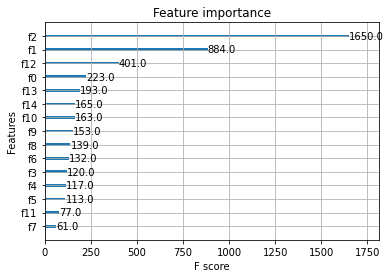

In [182]:
from xgboost import plot_importance

plot_importance(model_xgb)

In [172]:
tdf.columns

Index(['index', 'ZEV_MANDATES', 'POVERTY', 'DENSITY', 'ASTHMA', 'STATE',
       'EPA_REGION', 'YEAR', 'RACE_1.0', 'RACE_2.0', 'RACE_3.0', 'RACE_4.0',
       'RACE_5.0', 'RACE_6.0', 'RACE_7.0', 'RACE_77.0', 'RACE_99.0',
       'GENDER_1.0', 'GENDER_2.0', 'GENDER_9.0'],
      dtype='object')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


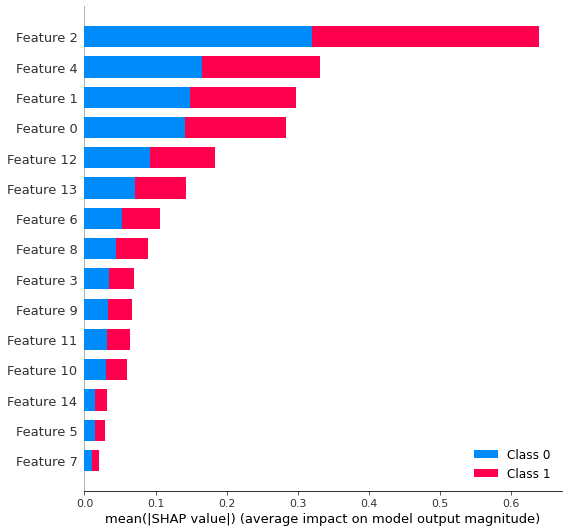

In [190]:
import shap

explained = shap.TreeExplainer(model_xgb)
shap_values = explained.shap_values(X_test)
shap.summary_plot(shap_values, X_test)